In [26]:
import pandas as pd
import numpy as np


In [27]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [28]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [29]:
df.shape

(5572, 5)

In [30]:
# Data clearning
# EDA
# Text Preprocessing
# Evaluation
# Improvement
# Website
# Deploy


In [31]:
# Data clearning

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [33]:
df.drop(columns =['Unnamed: 2',	'Unnamed: 3'	,'Unnamed: 4'], inplace = True)

In [34]:
df.sample(5)

,v1,v2
1187,ham,There's no point hangin on to mr not right if ...
5103,ham,In other news after hassling me to get him wee...
1571,ham,Near kalainar tv office.thenampet
1235,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1356,ham,U ned to convince him tht its not possible wit...


In [35]:
df.rename(columns = {'v1': 'target','v2' : 'text'}, inplace= True)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
encoder = LabelEncoder()

In [38]:
df['target'] = encoder.fit_transform(df['target'])

In [39]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [41]:
df.duplicated().sum()

403

In [42]:
df = df.drop_duplicates(keep = 'first')

In [43]:
df.shape

(5169, 2)

In [44]:
# EDA

In [45]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

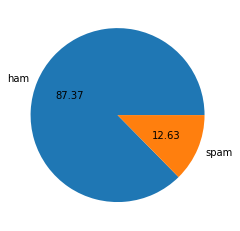

In [46]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f")
plt.show()

In [47]:
#data is imbalanced

In [48]:
!pip install nltk

In [49]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [50]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [51]:
df['nums_characters'] = df['text'].apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
 df['nums_word'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
 df['nums_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
df.head()

,target,text,nums_characters,nums_word,nums_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [55]:
df[['nums_characters','nums_word','nums_sent']].describe()

,nums_characters,nums_word,nums_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [56]:
df[df['target']== 0][['nums_characters','nums_word','nums_sent']].describe()

,nums_characters,nums_word,nums_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [57]:
df[df['target']== 1][['nums_characters','nums_word','nums_sent']].describe()

,nums_characters,nums_word,nums_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [58]:
import seaborn as sns

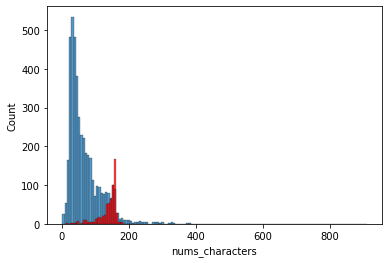

In [59]:
sns.histplot(df[df['target'] == 0]['nums_characters'])
sns.histplot(df[df['target'] == 1]['nums_characters'],color = 'red')
plt.show()


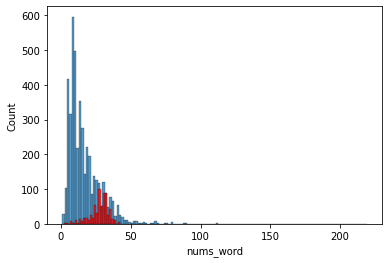

In [60]:
sns.histplot(df[df['target'] == 0]['nums_word'])
sns.histplot(df[df['target'] == 1]['nums_word'],color = 'red')
plt.show()

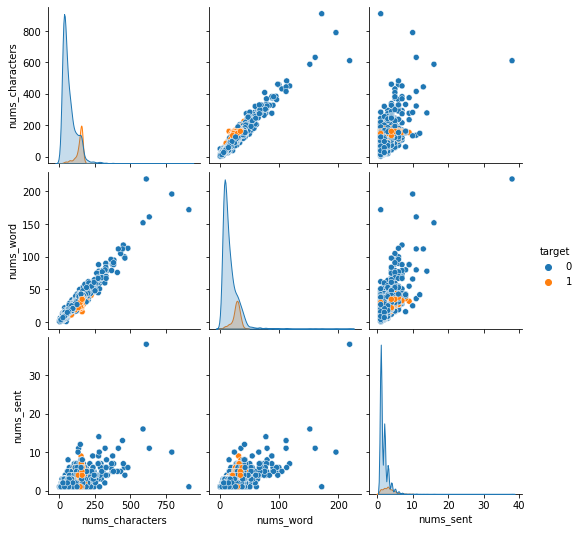

In [61]:
sns.pairplot(df,hue = 'target')

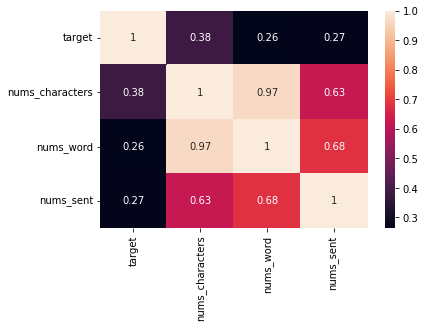

In [62]:
sns.heatmap(df.corr(),annot= True)

In [63]:
#data preprocessing

In [64]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  Y = []
  for i in text:
    if i.isalnum():
      Y.append(i)

  text = Y[:]
  Y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      Y.append(i)

  text = Y[:]
  Y.clear()
  for i in text:
    Y.append(ps.stem(i))    

  return " ".join(Y)

In [65]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [66]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [67]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [68]:
transform_text('I loved making Project on machine learning ')

'love make project machin learn'

In [69]:
df['transform_text'] = df['text'].apply(transform_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
df.head()

,target,text,nums_characters,nums_word,nums_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [71]:
from wordcloud import WordCloud

In [72]:
wc = WordCloud(width = 500,height= 500,min_font_size=10,background_color= 'white' )

In [73]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

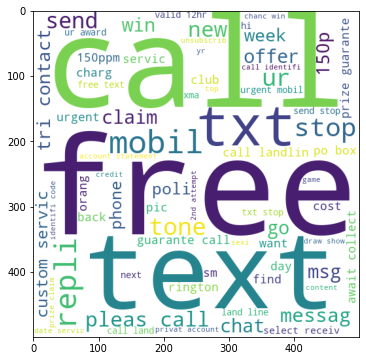

In [74]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


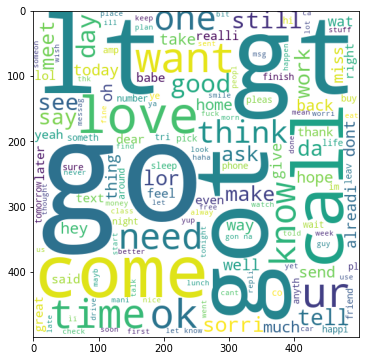

In [75]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [76]:
spam_corpas = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpas.append(word)


In [77]:
len(spam_corpas)

9883

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

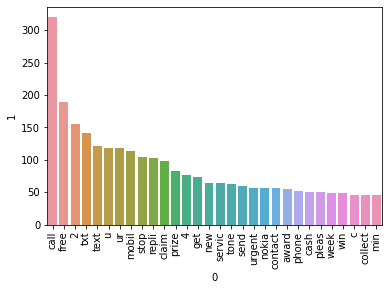

In [78]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpas).most_common(30))[0],pd.DataFrame(Counter(spam_corpas).most_common(30))[1])
plt.xticks(rotation = 'vertical')

In [79]:
han_corpas = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
  for word in msg.split():
    han_corpas.append(word)

In [80]:
len(han_corpas)


34771

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

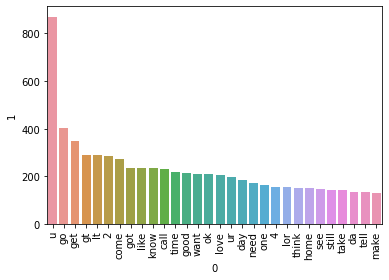

In [81]:

sns.barplot(pd.DataFrame(Counter(han_corpas).most_common(30))[0],pd.DataFrame(Counter(han_corpas).most_common(30))[1])
plt.xticks(rotation= 'vertical')

In [82]:
#MODEL BUILDING

In [83]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [84]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [85]:
X.shape

(5169, 6629)

In [86]:
y = df['target'].values

In [87]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [90]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [91]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [92]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8704061895551257
[[787 109]
 [ 25 113]]
0.509009009009009


In [93]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [94]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [96]:
svc =SVC(kernel ='sigmoid', gamma=5)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_features= 5)
lrc = LogisticRegression(solver= 'liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=5,random_state=2)
abc = AdaBoostClassifier(n_estimators=5,random_state=2)
bc =BaggingClassifier(n_estimators=5,random_state=2)
etc = ExtraTreesClassifier(n_estimators=5,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=5,random_state=2)
xgb = XGBClassifier(n_estimators=5,random_state=2)


In [103]:
clfs = {
    'SVC' : svc,
    'KN' :knc,
    'NB' :mnb,
    'DT' : dtc,
    'LR' :lrc,
    'Rf' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' :etc,
    'GBDT':gbdt,
    'xgb' :xgb

}

In [104]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  return accuracy,precision

In [105]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9400386847195358, 0.8166666666666667)

In [106]:
accuracy_scores = []
precision_scores = []

In [ ]:
for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
  